<span style="color:red; font-size:200%;">Ptojet 3: Anticipez les besoins en consommation de bâtiments</span>

# Problématique

## Introduction

Dans le cadre de l'engagement de la ville de Seattle à devenir neutre en émissions de carbone d'ici 2050, Ce projet se concentre particulièrement sur l'étude de la consommation énergétique et des émissions provenant des bâtiments non destinés à l’habitation.

## Objectif de Projet

Prévoir les émissions de CO2 ainsi que la consommation globale d'énergie pour des Batiments non résidentiels.

## Sources des données 

On a utilisé les données trouvées dans ce site : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy/about_data

## Taches principales

+Réaliser une courte analyse exploratoire.  
+Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

# caractéristiques du jeu de données

## Import des bibliothèques

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
#-----------
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Import des données

In [5]:
data=pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [6]:
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [7]:
data.tail(2)

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                     PropertyName           Address     City State  ZipCode  \
3374  South Park Community Center    8319 8th Ave S  Seattle    WA      NaN   
3375  Van Asselt Community Center  2820 S Myrtle St  Seattle    WA      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
3374                    7883603155                    1  GREATER DUWAMISH   
3375                    7857002030                    2  GREATER DUWAMISH   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3374  47.52832 -122.32431       1989                1.0               1   
3375  47.53939 -122.29536       1938                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3374             14101                   0                   14101   
3375             18258                   0                   18258   

                                                                         ListOfAllPropertyUseTypes  \
3374  Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare   
3375  Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3374     Other - Recreation                     6601.0   
3375     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3374  Fitness Center/Health Club/Gym                           6501.0   
3375  Fitness Center/Health Club/Gym                           8000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3374          Pre-school/Daycare                           484.0   
3375          Pre-school/Daycare                          1108.0   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3374                      NaN              NaN         51.000000   
3375                      NaN              NaN         63.099998   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
3374           55.500000          105.300003            110.800003   
3375           70.900002          115.800003            123.900002   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3374         7.194712e+05           7.828413e+05             0.0   
3375         1.152896e+06           1.293722e+06             0.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
3374       102248.0000        348870.1760         3706.010010   
3375       126774.3984        432554.2475         7203.419922   

      NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
3374       370601.0010        False       NaN        Compliant     NaN   
3375       720341.9922        False       NaN        Compliant     NaN   

      TotalGHGEmissions  GHGEmissionsIntensity  
3374              22.11                   1.57  
3375              41.27                   2.26

## Définition de chaque colonne

Pour une bonne compréhension de notre Dataframe et on utilisons le site des données, premierment on va creer dans un tableau chaque colonne avec sa définition afin de bien comprendre notre jeu de donnée.

In [8]:
data1= {
    'DataYear': 'Année civile (de janvier à décembre) représentée par chaque enregistrement de données.',
    'BuildingType': 'Classification du type de bâtiment par la ville de Seattle.',
    'PrimaryPropertyType': "L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). L'utilisation principale est définie comme une fonction qui représente plus de 50% d'une propriété. Il s'agit du champ calculé par l'EPA dans le gestionnaire de portefeuille.",
    'PropertyName': 'Nom officiel ou courant de la propriété tel qu\'entré dans le gestionnaire de portefeuille de l\'EPA.',
    'Address': 'Adresse de rue de la propriété.',
    'City': 'Ville de la propriété.',
    'State': 'État de la propriété.',
    'ZipCode': 'Code postal de la propriété.',
    'TaxParcelIdentificationNumber': 'Numéro d\'identification de la propriété dans le comté de King.',
    'CouncilDistrictCode': 'Code de district du conseil de la ville de Seattle.',
    'Neighborhood': 'Zone de quartier de la propriété définie par le département des quartiers de la ville de Seattle.',
    'Latitude': 'Latitude de la propriété.',
    'Longitude': 'Longitude de la propriété.',
    'YearBuilt': 'Année de construction ou de rénovation complète de la propriété.',
    'NumberofBuildings': 'Nombre de bâtiments inclus dans le rapport de la propriété. Dans les cas où une propriété est rapportée comme un campus, plusieurs bâtiments peuvent être inclus dans un rapport.',
    'NumberofFloors': 'Nombre d\'étages rapportés dans le gestionnaire de portefeuille.',
    'PropertyGFATotal': 'Surface brute totale du bâtiment et de la zone de stationnement.',
    'PropertyGFAParking': 'Espace total en pieds carrés de tous types de stationnement (entièrement fermé, partiellement fermé et ouvert).',
    'PropertyGFABuilding(s)': 'Espace total en pieds carrés entre les surfaces extérieures des murs d\'enceinte d\'un bâtiment. Cela inclut toutes les zones à l\'intérieur du(des) bâtiment(s), telles que les espaces des locataires, les espaces communs, les cages d\'escalier, les sous-sols, les espaces de stockage, etc.',
    'ListOfAllPropertyUseTypes': 'Toutes les utilisations de la propriété rapportées dans le gestionnaire de portefeuille.',
    'LargestPropertyUseType': 'La plus grande utilisation d\'une propriété (par exemple, bureau, magasin de détail) en termes de surface brute totale.',
    'LargestPropertyUseTypeGFA': 'La surface brute totale (GFA) de la plus grande utilisation de la propriété.',
    'SecondLargestPropertyUseType': 'La deuxième plus grande utilisation d\'une propriété (par exemple, bureau, magasin de détail) en termes de surface brute totale.',
    'SecondLargestPropertyUseTypeGFA': 'La surface brute totale (GFA) de la deuxième plus grande utilisation de la propriété.',
    'ThirdLargestPropertyUseType': 'La troisième plus grande utilisation d\'une propriété (par exemple, bureau, magasin de détail) en termes de surface brute totale.',
    'ThirdLargestPropertyUseTypeGFA': 'La surface brute totale (GFA) de la troisième plus grande utilisation de la propriété.',
    'YearsENERGYSTARCertified': 'Années où la propriété a reçu la certification ENERGY STAR.',
    'ENERGYSTARScore': "Un score de 1 à 100 calculé par l'EPA évaluant la performance énergétique globale d'une propriété, basé sur des données nationales pour corriger les différences entre le climat, les utilisations des bâtiments et les opérations. Un score de 50 représente la médiane nationale.",
    'SiteEUI(kBtu/sf)': "L'intensité d'utilisation d'énergie sur site (EUI) est l'utilisation d'énergie sur site de la propriété divisée par sa surface brute totale. L'utilisation d'énergie sur site est la quantité annuelle de toute l'énergie consommée par la propriété sur site, telle que rapportée sur les factures d'utilité. Site EUI est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.",
    'SiteEUIWN(kBtu/sf)': "L'intensité d'utilisation d'énergie sur site normalisée par temps (WN Site EUI) est l'utilisation d'énergie sur site normalisée par temps de la propriété divisée par sa surface brute totale (en pieds carrés). WN Site Energy est l'utilisation d'énergie sur site que la propriété aurait consommée pendant des conditions météorologiques moyennes sur 30 ans. WN Site EUI est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.",
    'SourceEUI(kBtu/sf)': "L'intensité d'utilisation d'énergie source (EUI) est l'utilisation d'énergie source de la propriété divisée par sa surface brute totale. L'utilisation d'énergie source est l'énergie annuelle utilisée pour faire fonctionner la propriété, y compris les pertes de génération, de transmission et de distribution. Source EUI est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.",
    'SourceEUIWN(kBtu/sf)': "L'intensité d'utilisation d'énergie source normalisée par temps (WN Source EUI) est l'utilisation d'énergie source normalisée par temps de la propriété divisée par sa surface brute totale. WN Source Energy est l'utilisation d'énergie source que la propriété aurait consommée pendant des conditions météorologiques moyennes sur 30 ans. WN Source EUI est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.",
    'SiteEnergyUse(kBtu)': "La quantité annuelle d'énergie consommée par la propriété provenant de toutes les sources d'énergie.",
    'SiteEnergyUseWN(kBtu)': "La quantité annuelle d'énergie consommée par la propriété provenant de toutes les sources d'énergie, ajustée à ce que la propriété aurait consommé pendant des conditions météorologiques moyennes sur 30 ans.",
    'SteamUse(kBtu)': "La quantité annuelle de vapeur de réseau consommée par la propriété sur site, mesurée en milliers d'unités thermiques britanniques (kBtu).",
    'Electricity(kWh)': "La quantité annuelle d'électricité consommée par la propriété sur site, y compris l'électricité achetée auprès du réseau et générée par des systèmes d'énergie renouvelable sur site, mesurée en kilowattheures (kWh).",
    'Electricity(kBtu)': "La quantité annuelle d'électricité consommée par la propriété sur site, y compris l'électricité achetée auprès du réseau et générée par des systèmes d'énergie renouvelable sur site, mesurée en milliers d'unités thermiques britanniques (kBtu).",
    'NaturalGas(therms)': "La quantité annuelle de gaz naturel fourni par l'entreprise de services publics consommée par la propriété, mesurée en therms.",
    'NaturalGas(kBtu)': "La quantité annuelle de gaz naturel fourni par l'entreprise de services publics consommée par la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu).",
    'DefaultData': "La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété.",
    'Comments': "Commentaires d'un propriétaire ou agent immobilier pour fournir un contexte sur l'utilisation énergétique du bâtiment.",
    'ComplianceStatus': "Si une propriété a respecté les exigences de benchmarking énergétique pour l'année de déclaration en cours.",
    'Outlier': "Si une propriété est un écart élevé ou bas (Oui/Non).",
    'TotalGHGEmissions': "La quantité totale d'émissions de gaz à effet de serre, y compris le dioxyde de carbone, le méthane et le protole protoxyde d'azote, libérées dans l'atmosphère en raison de la consommation d'énergie de la propriété, mesurée en tonnes métriques d'équivalent dioxyde de carbone. Ce calcul utilise un facteur d'émissions de GES du portefeuille de ressources de Seattle City Light"
}

df1 = pd.DataFrame(list(data1.items()), columns=['Colonnes', 'Traduction'])
df1

Colonnes  \
0                          DataYear   
1                      BuildingType   
2               PrimaryPropertyType   
3                      PropertyName   
4                           Address   
5                              City   
6                             State   
7                           ZipCode   
8     TaxParcelIdentificationNumber   
9               CouncilDistrictCode   
10                     Neighborhood   
11                         Latitude   
12                        Longitude   
13                        YearBuilt   
14                NumberofBuildings   
15                   NumberofFloors   
16                 PropertyGFATotal   
17               PropertyGFAParking   
18           PropertyGFABuilding(s)   
19        ListOfAllPropertyUseTypes   
20           LargestPropertyUseType   
21        LargestPropertyUseTypeGFA   
22     SecondLargestPropertyUseType   
23  SecondLargestPropertyUseTypeGFA   
24      ThirdLargestPropertyUseType   
25   ThirdLargestPropertyUseTypeGFA   
26         YearsENERGYSTARCertified   
27                  ENERGYSTARScore   
28                 SiteEUI(kBtu/sf)   
29               SiteEUIWN(kBtu/sf)   
30               SourceEUI(kBtu/sf)   
31             SourceEUIWN(kBtu/sf)   
32              SiteEnergyUse(kBtu)   
33            SiteEnergyUseWN(kBtu)   
34                   SteamUse(kBtu)   
35                 Electricity(kWh)   
36                Electricity(kBtu)   
37               NaturalGas(therms)   
38                 NaturalGas(kBtu)   
39                      DefaultData   
40                         Comments   
41                 ComplianceStatus   
42                          Outlier   
43                TotalGHGEmissions   

                                                                                                                                                                                                                                                                                                                                                                                                                                                        Traduction  
0                                                                                                                                                                                                                                                                                                                                                                           Année civile (de janvier à décembre) représentée par chaque enregistrement de données.  
1                                                                                                                                                                                                                                                                                                                                                                                                      Classification du type de bâtiment par la ville de Seattle.  
2                                                                                                                                                                                                L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). L'utilisation principale est définie comme une fonction qui représente plus de 50% d'une propriété. Il s'agit du champ calculé par l'EPA dans le gestionnaire de portefeuille.  
3                                                                                                                                                                                                                                                                                                                                                              Nom officiel ou courant de la propriété tel qu'entré dans le gestionnaire de portefeuille de l'EPA.  
4     

## Taille et type des données

In [9]:
data.shape

(3376, 46)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

On peut constater que notre jeu de données contient 3376 lignes et 46 colonnes, il y a des lignes qui contient des valeurs manquantes, ainsi que les différents types existant dans notre dataframe float64 et object.

# Nettoyage des données

## Nettoyage des colonnes catégorielles¶

## Contenu des colonnes

Dans un premier temps, nous entamerons le processus de nettoyage des colonnes catégorielles. À cet effet, nous afficherons le contenu de chaque colonne ainsi que leur description.

In [11]:
colonnes_qualitatives = data.select_dtypes(include=['object'])

resume_contenu_unique = pd.DataFrame(index=colonnes_qualitatives.columns, columns=['Contenu Unique'])

for colonne in colonnes_qualitatives:
    resume_contenu_unique.loc[colonne, 'Contenu Unique'] = data[colonne].unique()

resume_contenu_unique

Contenu Unique
BuildingType                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [12]:
data.describe(include='object')

BuildingType   PrimaryPropertyType     PropertyName  \
count             3376                  3376             3376   
unique               8                    24             3362   
top     NonResidential  Low-Rise Multifamily  Northgate Plaza   
freq              1460                   987                3   

                  Address     City State TaxParcelIdentificationNumber  \
count                3376     3376  3376                          3376   
unique               3354        1     1                          3268   
top     2600 SW Barton St  Seattle    WA                    1625049001   
freq                    4     3376  3376                             8   

       Neighborhood ListOfAllPropertyUseTypes LargestPropertyUseType  \
count          3376                      3367                   3356   
unique           19                       466                     56   
top        DOWNTOWN       Multifamily Housing    Multifamily Housing   
freq            573                       866                   1667   

       SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
count                          1679                         596   
unique                           50                          44   
top                         Parking                Retail Store   
freq                            976                         110   

       YearsENERGYSTARCertified ComplianceStatus      Outlier  
count                       119             3376           32  
unique                       65                4            2  
top                        2016        Compliant  Low outlier  
freq                         14             3211           23

Il est facilement observable que notre colonne "building type" comporte 3376 lignes, réparties en 8 catégories. Dans notre dataframe, le type de bâtiment prédominant est le "NonRésidentiel", avec une fréquence de 1460 occurrences.afin de bien comprendre notre jeu de données on a suit le meme raisonnement pour les autres colonnes.

### Suppression des colonnes inutiles

Maintenant que nous avons une compréhension approfondie de l'objectif final de notre ensemble de données, nous sommes en mesure d'éliminer les colonnes inutiles pour notre analyse.

In [13]:
data = data.drop(['TaxParcelIdentificationNumber','City','State','YearsENERGYSTARCertified','Address','PropertyName'],axis=1)

### Supression des données résidentiel

Ensuite, on souhaite effectuer des prévisions pour les bâtiments non résidentiels. La première étape consiste donc à exclure les données des bâtiments résidentiels.

In [14]:
def supprimer_lignes_categorie(dataframe, colonne_cible, categories_a_supprimer):
    if colonne_cible not in dataframe.columns:
        raise ValueError(f"La colonne '{colonne_cible}' n'existe pas dans le DataFrame.")

    dataframe_filtre = dataframe[~dataframe[colonne_cible].isin(categories_a_supprimer)]

    return dataframe_filtre

In [15]:
categories_a_supprimer1 = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']
data = supprimer_lignes_categorie(data, 'BuildingType', categories_a_supprimer1)

In [16]:
categories_a_supprimer2 = ['Mixed Use Property', 'Senior Care Community','Low-Rise Multifamily','Residence Hall']
data = supprimer_lignes_categorie(data, 'PrimaryPropertyType', categories_a_supprimer2)

In [17]:
data = data[~data['LargestPropertyUseType'].isin(['Residential Care Facility'])]

### Supression des symboles 

Dans le tableau de la partie 3.2, il est observable que notre ensemble de données renferme des symboles indésirables. Afin d'obtenir des résultats précis et d'améliorer la lisibilité de nos graphiques, nous avons éliminé ces symboles au cours de cette étape.

In [18]:
import re
def pretraitement_colonnes(dataframe, colonnes_cibles, remplacements={}):
    for colonne_cible in colonnes_cibles:
        if colonne_cible not in dataframe.columns:
            raise ValueError(f"La colonne '{colonne_cible}' n'existe pas dans le DataFrame.")
    for colonne_cible in colonnes_cibles:
        dataframe[colonne_cible] = dataframe[colonne_cible].apply(lambda x: re.sub(r'\(.*\)', '', str(x)))

        for ancien, nouveau in remplacements.items():
            dataframe[colonne_cible] = dataframe[colonne_cible].apply(lambda x: str(x).replace(ancien, nouveau))

    return dataframe

In [19]:
colonness_cible = ['ListOfAllPropertyUseTypes','LargestPropertyUseType','SecondLargestPropertyUseType']
remplacements = {',': '-', '/': '-'}

data = pretraitement_colonnes(data, colonness_cible, remplacements)

### Regroupement des catégories 

Pendant cette phase, pour éviter la redondance des bâtiments partageant le même objectif, nous avons opté pour le regroupement des bâtiments identiques.

In [20]:
def appliquer_regroupement_sur_colonnes(dataframe, colonnes_cibles, group_mapping):
    for colonne_cible in colonnes_cibles:
        if colonne_cible not in dataframe.columns:
            raise ValueError(f"La colonne '{colonne_cible}' n'existe pas dans le DataFrame.")

    for colonne_cible in colonnes_cibles:
        dataframe[colonne_cible] = dataframe[colonne_cible].map(group_mapping)

    return dataframe

In [21]:
group_mapping = {
    'Hotel': 'Hotel',
    'Police Station': 'Public Services',
    'Other - Entertainment/Public Assembly': 'Entertainment',
    'Library': 'University',
    'Fitness Center/Health Club/Gym': 'Fitness Center-Health Club-Gym',
    'Courthouse': 'Public Services',
    'Other': 'Other',
    'K-12 School': 'University', 
    'College/University': 'University',
    'Automobile Dealership': 'Retail Store',
    'Office': 'Office',
    'Self-Storage Facility': 'Warehouse',
    'Non-Refrigerated Warehouse': 'Warehouse',
    'Other - Mall': 'Retail Store',
    'Medical Office': 'Office',
    'Retail Store': 'Retail Store',
    'Hospital (General Medical & Surgical)': 'Hospital',
    'Museum': 'Entertainment',
    'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Repair Services ',
    'Other - Lodging/Residential': 'Hotel', 
    'Other/Specialty Hospital': 'Hospital',
    'Financial Office': 'Office',
    'Distribution Center': 'Warehouse',
    'Parking': 'Other',
    'Worship Facility': 'Other',
    'Data Center': 'Office',
    'Supermarket/Grocery Store': 'Retail Store',
    'Convention Center': 'Entertainment',
    'Urgent Care/Clinic/Other Outpatient': 'Hospital',
    'Laboratory': 'Laboratory',
    'Other - Services': 'Other',
    'Strip Mall': 'Retail Store',
    'Wholesale Club/Supercenter': 'Retail Store',
    'Refrigerated Warehouse': 'Warehouse',
    'Restaurant': 'Restaurant',
    'Manufacturing/Industrial Plant': 'Manufacturing-Industrial Plant',
    'Other - Recreation': 'Entertainment',
    'Lifestyle Center': 'Retail Store',
    'Other - Public Services': 'Public Services',
    'Social/Meeting Hall': 'Entertainment',
    'Other - Education': 'University',
    'Fire Station': 'Public Services',
    'Performing Arts': 'Entertainment',
    'Residential Care Facility': 'Residential Care Facility',
    'Bank Branch': 'Office',
    'Food Service': 'Restaurant',
    'Adult Education': 'University',  
    'Other - Utility': 'Other',
    'Movie Theater': 'Entertainment',
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Personal Services ',
    'Other - Restaurant/Bar': 'Restaurant',
    'Pre-school/Daycare': 'University', 
    'Prison/Incarceration': 'Other'
}

colonnes_cibles = ['LargestPropertyUseType','SecondLargestPropertyUseType']

data = appliquer_regroupement_sur_colonnes(data, colonnes_cibles, group_mapping)

In [22]:
def regrouper_categories(dataframe, colonne_cible):
    if colonne_cible not in dataframe.columns:
        raise ValueError(f"La colonne '{colonne_cible}' n'existe pas dans le DataFrame.")
    dataframe[colonne_cible] = dataframe[colonne_cible].replace(
        {
            'K-12 School': 'University',
            'University': 'University',
            'Small- and Mid-Sized Office': 'Office',
            'Large Office': 'Office',
            'Medical Office': 'Office',
            'Office': 'Office',
            'Self-Storage Facility': 'Warehouse',
            'Warehouse': 'Warehouse',
            'Distribution Center': 'Warehouse',
            'Refrigerated Warehouse': 'Warehouse',
            'Retail Store': 'Marketing',
            'Supermarket / Grocery Store': 'Marketing',
            'Other': 'Other',
            'Worship Facility': 'Other',
            'Laboratory': 'Other'
        }
    )

    return dataframe


colonne_cible = 'PrimaryPropertyType'
data = regrouper_categories(data, colonne_cible)

### Neighborhood

Pour la colonne 'Neighborhood', étant donné que certaines lignes sont écrites en minuscules et d'autres en majuscules, nous avons remplacé toutes les lignes en majuscules.

In [23]:
data['Neighborhood'] = data['Neighborhood'].str.upper()

In [24]:
#DELRIDGE NEIGHBORHOODS Par delridge
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)

### ComplianceStatus

Pour Compliance Statuts on a remplacé le mot missing data et Error - Correct Default Data par nan.

In [25]:
data['ComplianceStatus'].replace('Missing Data', np.nan, inplace=True)
data['ComplianceStatus'].replace('Error - Correct Default Data', np.nan, inplace=True)

### Outlier

In [26]:
data['Outlier'] = data['Outlier'].fillna('normal')

## Nettoyage des Colonnes numériques 

La méthode .describe() nous a permis d'obtenir une idée globale de nos colonnes numériques. Dans cette étape, nous allons maintenant entamer le nettoyage de nos colonnes numériques.

In [27]:
data.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    1509.000000    1509.0   1497.000000          1509.000000   
mean    15870.516236    2016.0  98116.865731             4.333333   
std     13725.182113       0.0     18.059727             2.206413   
min         1.000000    2016.0  98006.000000             1.000000   
25%       566.000000    2016.0  98105.000000             2.000000   
50%     21088.000000    2016.0  98112.000000             4.000000   
75%     24531.000000    2016.0  98125.000000             7.000000   
max     50224.000000    2016.0  98199.000000             7.000000   

          Latitude   Longitude    YearBuilt  NumberofBuildings  \
count  1509.000000  1509.00000  1509.000000        1508.000000   
mean     47.615140  -122.33317  1962.019881           1.183024   
std       0.048801     0.02469    32.195455           3.075848   
min      47.499170  -122.41182  1900.000000           0.000000   
25%      47.582920  -122.34340  1931.000000           1.000000   
50%      47.611850  -122.33303  1965.000000           1.000000   
75%      47.649010  -122.32219  1988.000000           1.000000   
max      47.733870  -122.25864  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1509.000000      1.509000e+03         1509.000000   
mean         4.171637      1.207561e+05        12771.932406   
std          6.769830      3.083519e+05        42789.577758   
min          0.000000      1.128500e+04            0.000000   
25%          1.000000      2.982000e+04            0.000000   
50%          2.000000      4.995000e+04            0.000000   
75%          4.000000      1.060410e+05            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.509000e+03               1.504000e+03   
mean             1.079842e+05               1.027065e+05   
std              2.954001e+05               2.887308e+05   
min              1.128500e+04               7.583000e+03   
25%              2.880000e+04               2.629175e+04   
50%              4.769900e+04               4.555800e+04   
75%              9.625400e+04               9.404625e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       723.000000                      243.000000   
mean                      36917.896676                    11399.572840   
std                       69294.046009                    27795.450693   
min                           0.000000                        0.000000   
25%                        4708.500000                     1763.000000   
50%                       10918.000000                     5000.000000   
75%                       32851.000000                     9987.500000   
max                      686750.000000                   303910.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      1030.000000       1507.000000         1507.000000   
mean         65.808738         70.306768           72.605640   
std          28.231435         72.591415           73.544519   
min           1.000000          0.000000            0.000000   
25%          49.000000         33.150000           34.799999   
50%          73.500000         50.599998           53.000000   
75%          89.000000         78.950001           82.599998   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1508.000000           1508.000000         1.508000e+03   
mean           172.056830            174.085279         8.209330e+06   
std            180.339914            180.296890         2.941388e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.475000             77.500000         1.216921e+06   
50%  

Commençons par la suppression des colonnes inutiles pour cette étude.

In [28]:
#Colonnes unutiles
data=data.drop(['DataYear','ZipCode','CouncilDistrictCode','DefaultData','Comments','OSEBuildingID'],axis=1)

Ensuite, on peut voir qu'il y a des colonnes identiques, la seule différence entre elles est l'unité.Donc, on supprime les colonnes répétées.

In [29]:
#Supression des colonnes identiques
data=data.drop(['Electricity(kWh)','NaturalGas(therms)','SiteEnergyUse(kBtu)'],axis=1)

Maintenant on va supprimer les valeurs négatives ou égales à 0 pour nos variables cibles(SiteEnergyUseWN(kBtu),'TotalGHGEmissions')

In [30]:
#ELe(kbtu),TotalGHGEmissions,GHGEMISSIONIntensity Supression des valeurs négatives
colonnes_a_considerer = ['SiteEnergyUseWN(kBtu)','Electricity(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity']
data = data.loc[(data[colonnes_a_considerer] >= 0).all(axis=1)]

Supression des valeurs manquantes des variables cibles.

In [31]:
#Supprimer les lignes avec valeurs manquantes de la variable cible
indices_a_supprimer1 = data[
    (data['SiteEnergyUseWN(kBtu)'] == np.nan) |
    (data['TotalGHGEmissions'] == np.nan) ].index
data.drop(indices_a_supprimer1, inplace=True)

Supression des batiments avec un surface égale à 0 ou nombre de batiment égale à 0.

In [32]:
# Les Batiments avec NumberOfBuildings PropertyGFATotal=0
data['NumberofFloors'].unique()
indices_a_supprimer = data[
    (data['PropertyGFATotal']== 0)|(data['NumberofBuildings']== 0)].index
data.drop(indices_a_supprimer, inplace=True)

Dans cette étape on va vérifier si la surface totale est juste.

In [33]:
#Surface Totale vérification
data['SurfaceTotale'] = data[['PropertyGFAParking', 'PropertyGFABuilding(s)']].sum(axis=1)
data['Comparaison'] = data['SurfaceTotale'] == data['PropertyGFATotal']
#data['Comparaison'] 

In [34]:
data=data.drop(['Comparaison','SurfaceTotale'],axis=1)

## Lignes Dupliquées

On peut constaté qu'on a pas des lignes dupliquées dans notre dataframe

In [35]:
data_dupliquees = data[data.duplicated()]
data_dupliquees

Empty DataFrame
Columns: [BuildingType, PrimaryPropertyType, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

## Valeurs manquantes 

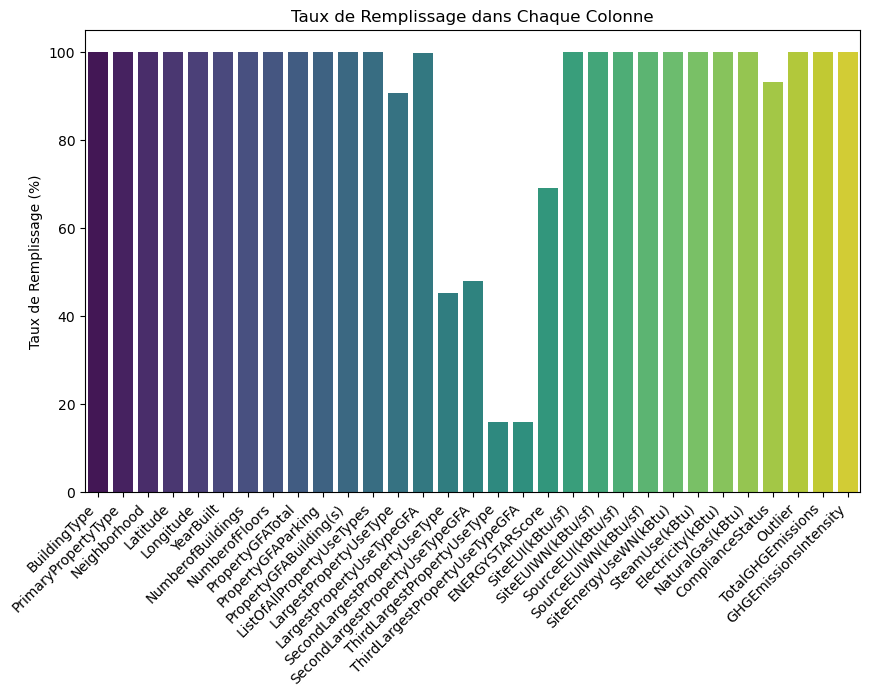

In [36]:
taux_remplissage = 1 - data.isnull().mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=taux_remplissage.index, y=taux_remplissage.values * 100, palette='viridis')
plt.title("Taux de Remplissage dans Chaque Colonne")
plt.ylabel("Taux de Remplissage (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

On constate que les colonnes ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA contient beaucoup des valeurs manquantes donc on va supprimer ces colonnes.

In [37]:
data=data.drop([ 'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'],axis=1)

### Imputation de Energy Score

Ensuite pour Energy Score on a utiliser KNNImputer pour l'imputation des valeurs manquantes.

In [38]:
#Imputation
from sklearn.impute import KNNImputer
colonnes_numeriques = data.select_dtypes(include='number')
imputer = KNNImputer(n_neighbors=5)
data[colonnes_numeriques.columns] = imputer.fit_transform(colonnes_numeriques)

## Valeurs abberantes

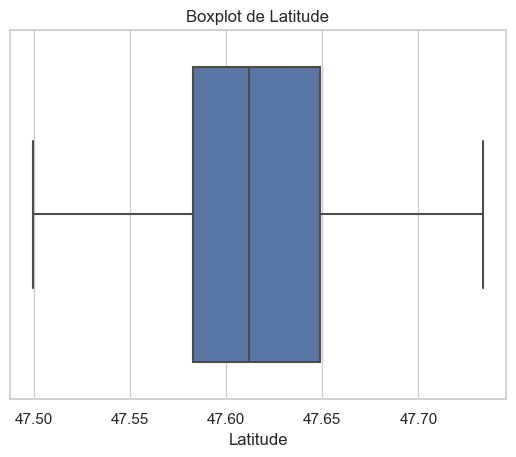

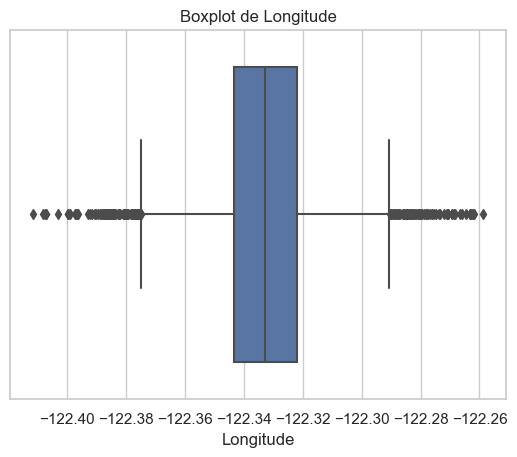

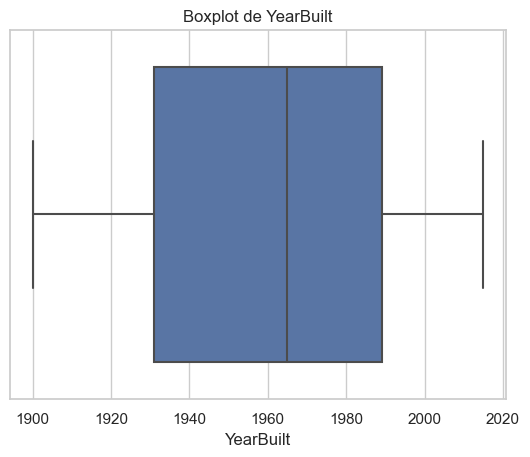

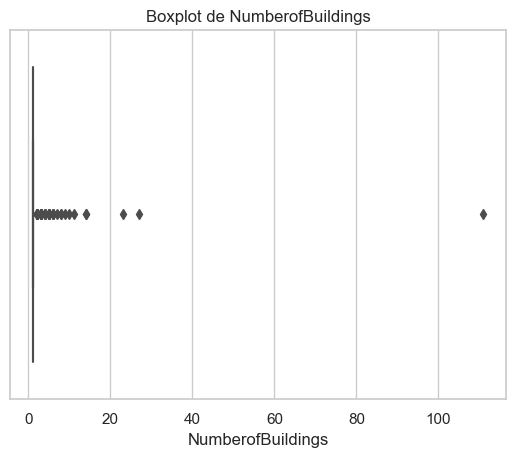

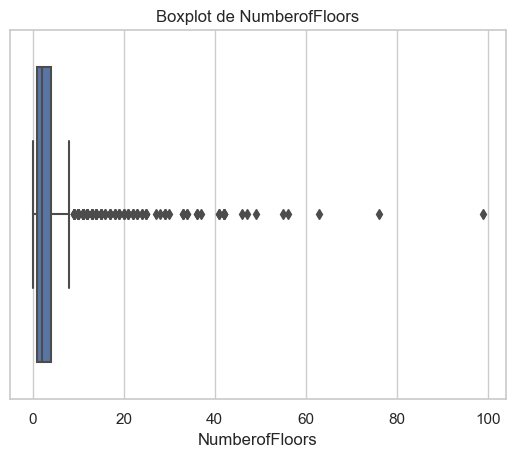

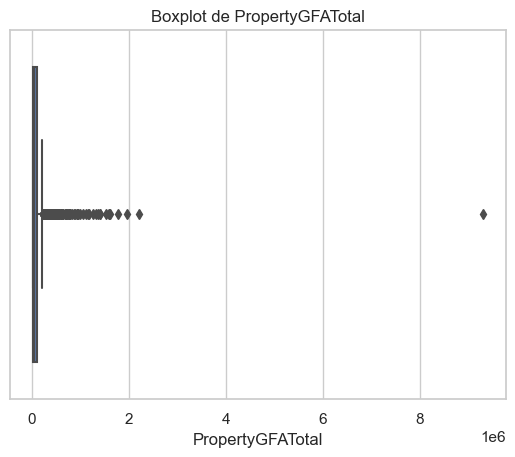

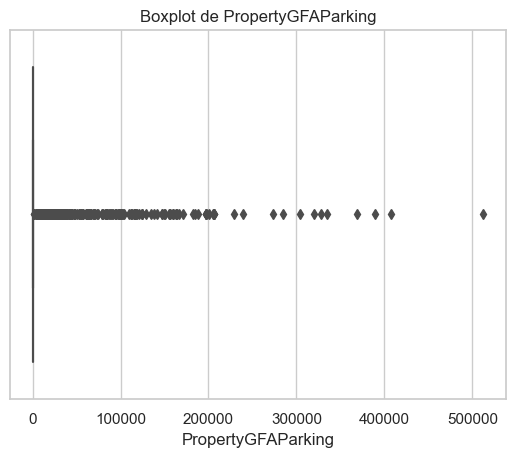

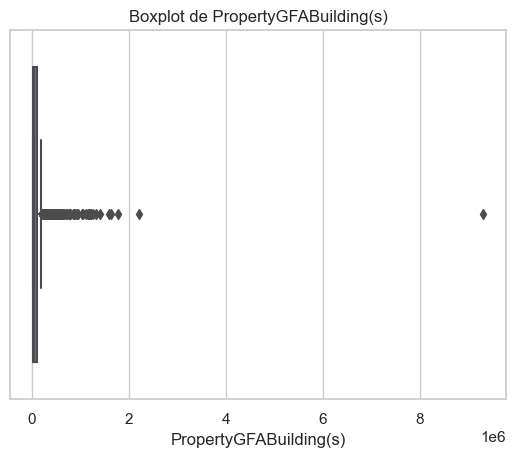

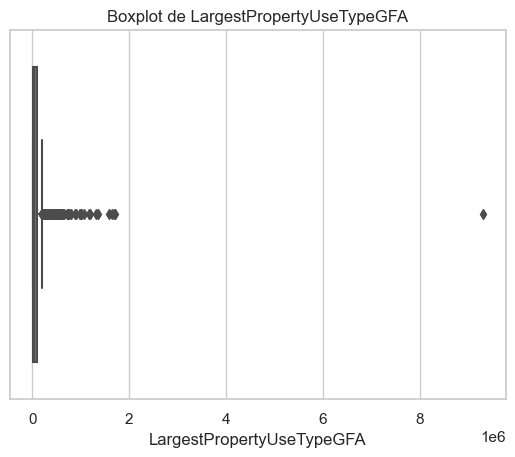

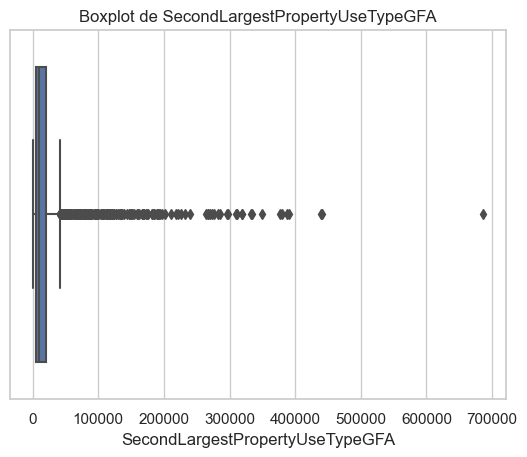

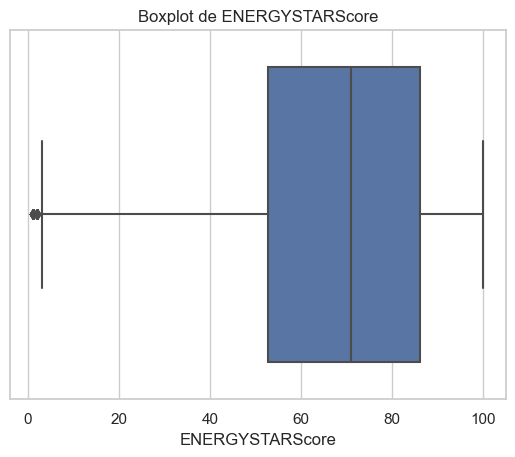

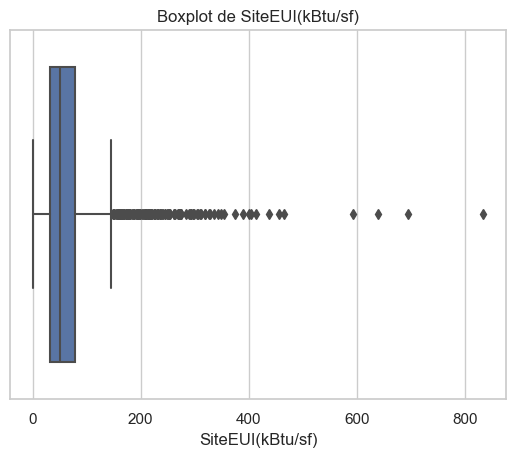

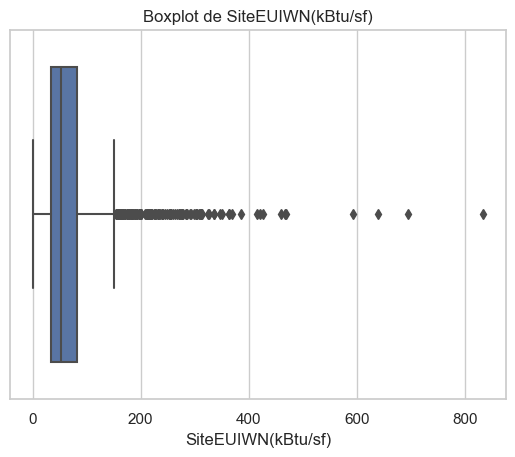

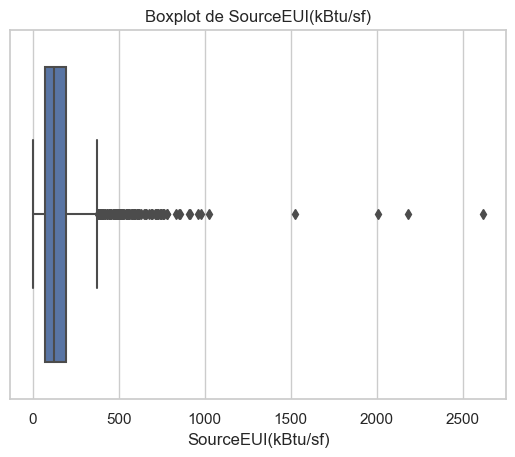

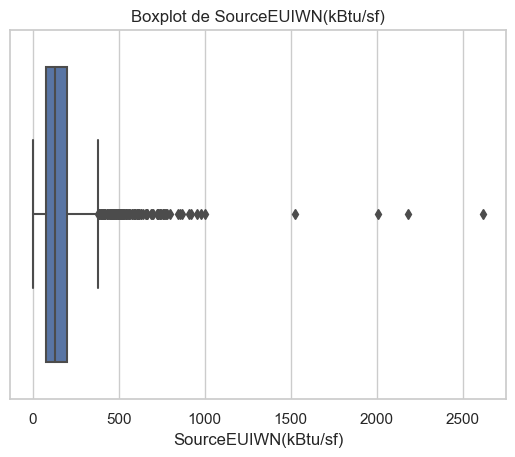

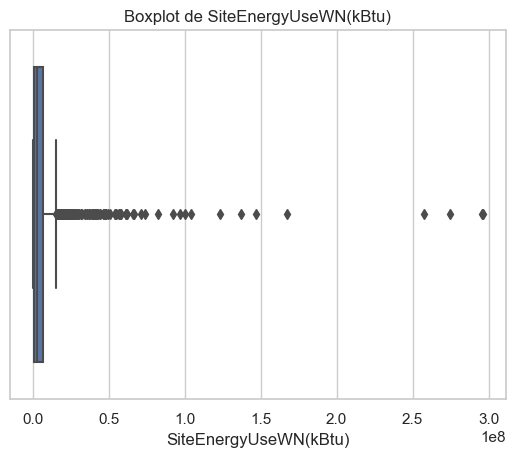

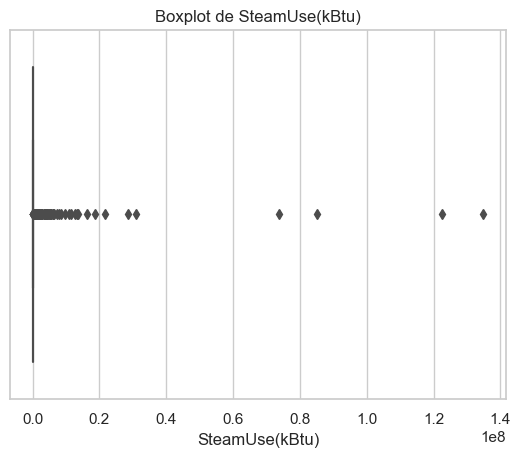

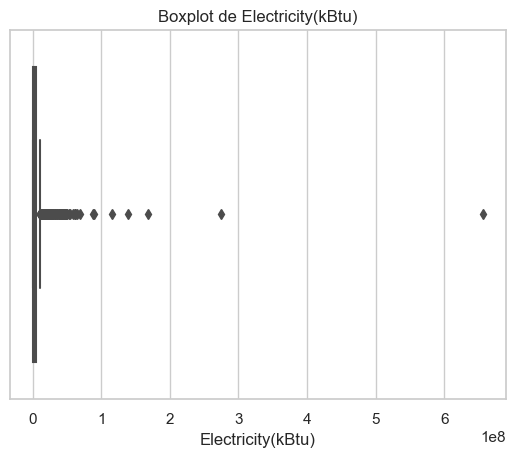

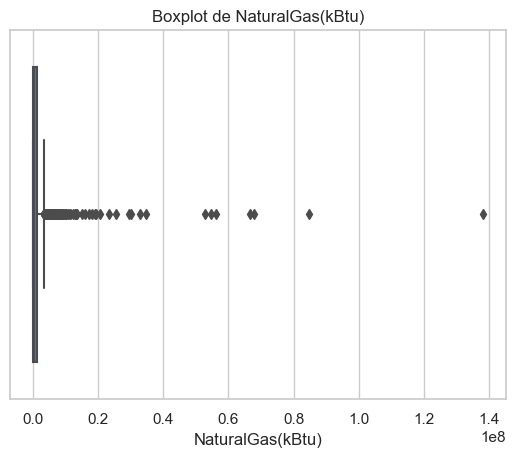

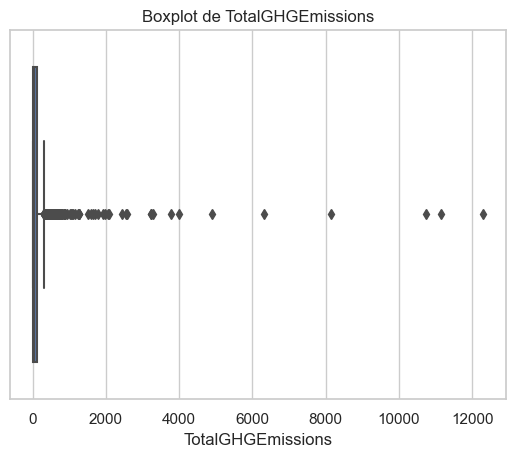

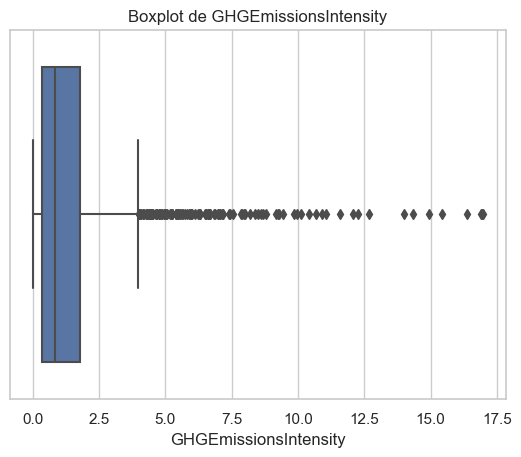

In [39]:
numeric_colonnes=data.select_dtypes(include='number')
for col in numeric_colonnes.columns:
    plt.figure()
    sns.set(style="whitegrid")  
    sns.boxplot(x=numeric_colonnes[col])  
    plt.title(f"Boxplot de {col}")  
    plt.show()

In [40]:
#Number of building superieur à 100
data= data[data['NumberofBuildings'] <= 100]
#PropertyGFATotal sup à 8 1e6
data= data[data['PropertyGFATotal'] <= 8e6]
#SiteEner
data= data[data['SiteEnergyUseWN(kBtu)'] <= 2.5e8]
#SteamUse
data= data[data['SteamUse(kBtu)'] <= 1.2e8]

Notre jeu de données contient de nombreuses valeurs aberrantes, mais étant donné que le nettoyage des données n'est pas notre objectif principal dans ce projet, nous allons mener notre étude en incluant ces valeurs aberrantes.

## Feature engineering

### Définition

La "feature engineering" (ingénierie des caractéristiques) est le processus de création et de modification de variables (caractéristiques ou "features") dans un ensemble de données, dans le but d'améliorer les performances d'un modèle d'apprentissage automatique. Il s'agit d'une étape cruciale dans le développement de modèles prédictifs efficaces. Les objectifs de la feature engineering peuvent inclure l'amélioration de la précision du modèle, la réduction du surajustement (overfitting), l'accélération de l'entraînement du modèle, ou encore la création de caractéristiques plus significatives et informatives.

### Création de nouveaux colonnes

Dans cette étape, nous avons créé plusieurs colonnes qui peuvent nous servir à améliorer notre prévision.

In [41]:
data['Proportion_surface_parking']= data['PropertyGFAParking'] / data['PropertyGFATotal']
data['Proportion_surface_second']= data['SecondLargestPropertyUseTypeGFA'] / data['PropertyGFATotal']
data['Proportion_electricty_energy']= data['Electricity(kBtu)'] / data['SiteEnergyUseWN(kBtu)']
data['Proportion_gaz_energy']= data['NaturalGas(kBtu)'] / data['SiteEnergyUseWN(kBtu)']
data['Proportion_vap_energy']= data['SteamUse(kBtu)'] / data['SiteEnergyUseWN(kBtu)']

In [42]:
# Distance centre ville Batiment
centre_Seattle=(47.6062095,-122.3320708)
import geopy.distance
def distance_batiment_ville(row):
    coord_batiment = (row['Latitude'], row['Longitude'])
    return geopy.distance.geodesic(coord_batiment, centre_Seattle).km

data['distance_ville_batiment']=data.apply(distance_batiment_ville, axis=1)

# Analyses univarié des variables cibles

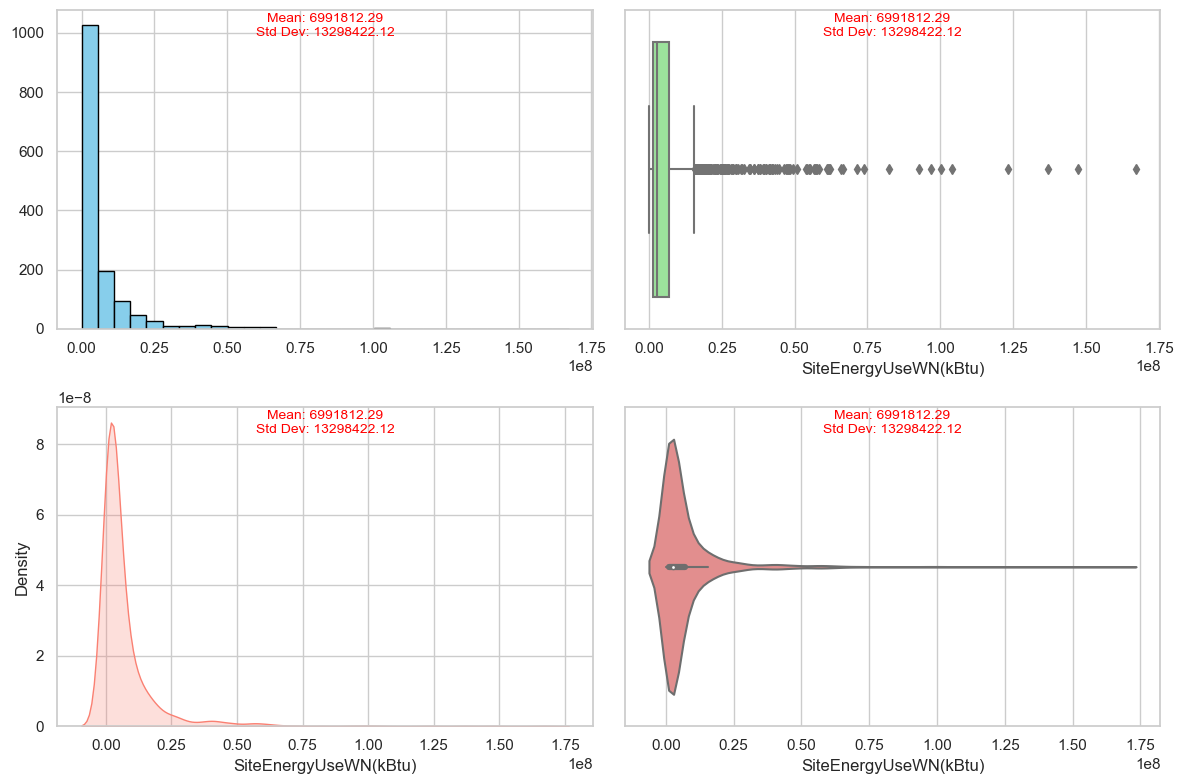

In [67]:
variable_to_analyze = data['SiteEnergyUseWN(kBtu)']

descriptive_stats = variable_to_analyze.describe()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(variable_to_analyze, bins=30, color='skyblue', edgecolor='black')
#axs[0, 0].set_title('Histogramme')

sns.boxplot(x=variable_to_analyze, ax=axs[0, 1], color='lightgreen')
#axs[0, 1].set_title('Boxplot')

sns.kdeplot(variable_to_analyze, ax=axs[1, 0], color='salmon', fill=True)
#axs[1, 0].set_title('Estimation de densité kernel')

sns.violinplot(x=variable_to_analyze, ax=axs[1, 1], color='lightcoral')
#axs[1, 1].set_title('Violin Plot')

for ax in axs.flat:
    ax.annotate(f"Mean: {descriptive_stats['mean']:.2f}\nStd Dev: {descriptive_stats['std']:.2f}",
                xy=(0.5, 0.95), xycoords='axes fraction',
                ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

L'histogramme à gauche indique que la majorité des observations sont regroupées à des valeurs relativement basses, avec quelques valeurs élevées qui tirent la moyenne vers le haut.Notre variable peut être influencé par des valeurs aberrantes du côté droit.

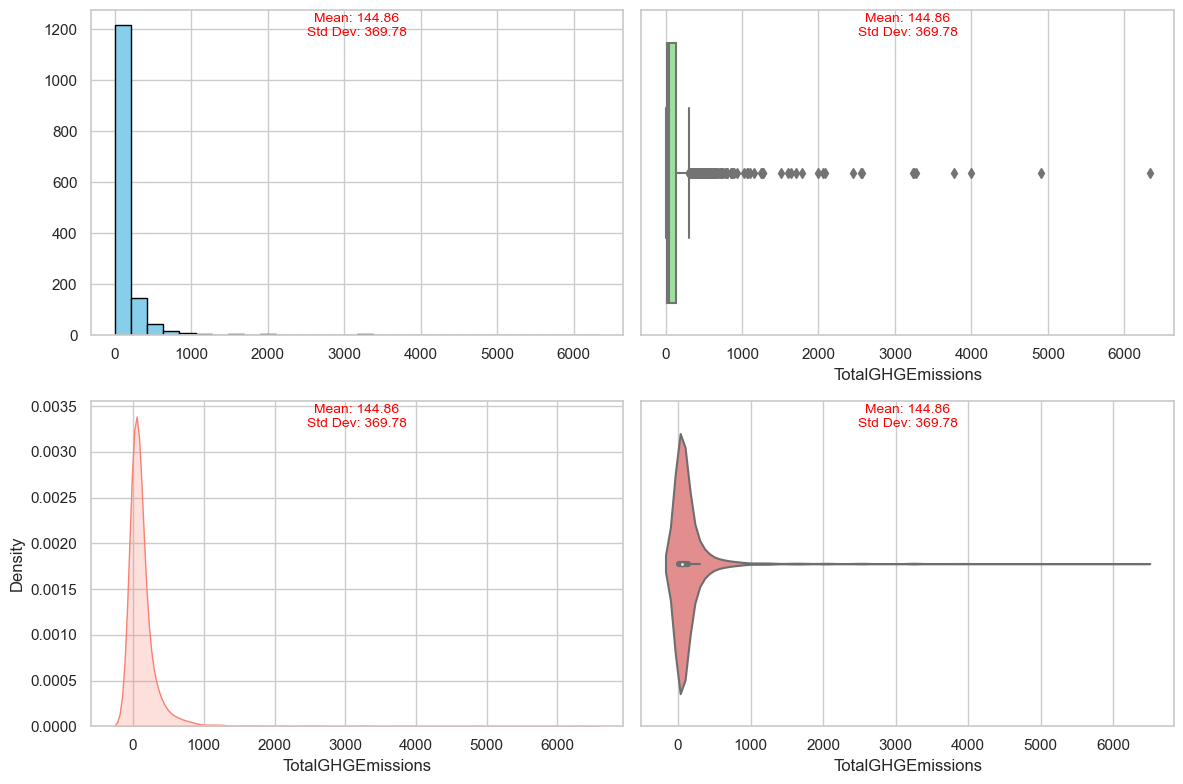

In [68]:
variable_to_analyze = data['TotalGHGEmissions']

descriptive_stats = variable_to_analyze.describe()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(variable_to_analyze, bins=30, color='skyblue', edgecolor='black')
#axs[0, 0].set_title('Histogramme')

sns.boxplot(x=variable_to_analyze, ax=axs[0, 1], color='lightgreen')
#axs[0, 1].set_title('Boxplot')

sns.kdeplot(variable_to_analyze, ax=axs[1, 0], color='salmon', fill=True)
#axs[1, 0].set_title('Estimation de densité kernel')

sns.violinplot(x=variable_to_analyze, ax=axs[1, 1], color='lightcoral')
#axs[1, 1].set_title('Violin Plot')

for ax in axs.flat:
    ax.annotate(f"Mean: {descriptive_stats['mean']:.2f}\nStd Dev: {descriptive_stats['std']:.2f}",
                xy=(0.5, 0.95), xycoords='axes fraction',
                ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

Meme remarque pour la variable TotalGHGEmissions L'histogramme à gauche indique que la majorité des observations sont regroupées à des valeurs relativement basses, avec quelques valeurs élevées qui tirent la moyenne vers le haut.Notre variable peut être influencé par des valeurs aberrantes du côté droit.

# Analyse Bivarié

In [45]:
import plotly.express as px
fig = px.scatter_3d(data, x='PropertyGFATotal', y='SiteEnergyUseWN(kBtu)', z='TotalGHGEmissions',
                    color='PropertyGFATotal', 
                    size='SiteEnergyUseWN(kBtu)',  
                    labels={'value': 'Valeur', 'surface_batiment': 'PropertyGFATotal'},
                    title='Variation de la consommation d\'énergie et des émissions de CO2 en fonction de la surface du bâtiment',
                    template='plotly_dark',
                    width=1000, height=600
                   )

fig.show()

In [46]:
consommation_energie=data['SiteEnergyUseWN(kBtu)']
fig = px.scatter(data, x='Longitude', y='Latitude', color=consommation_energie, 
                 size=consommation_energie, size_max=30, 
                 color_continuous_scale='turbid',  
                 labels={'color': 'Consommation d\'énergie'},
                 title='Consommation d\'énergie en fonction de l\'altitude et de la longitude')

fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGray')),
                  selector=dict(mode='markers'))

fig.show()

On peut constater que la plupart des batiments qui consomment beaucoup d'énergie se situe au centre de la ville.

In [47]:
emission=data['TotalGHGEmissions']
fig = px.scatter(data,x='Longitude', y='Latitude', color=emission, 
                 size=emission, size_max=30, 
                 color_continuous_scale='turbid',  
                 labels={'color': 'Consommation d\'énergie'},
                 title='Consommation de l\'émission en fonction de l\'altitude et de la longitude')

fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGray')),
                  selector=dict(mode='markers'))

fig.show()

Meme chose pour l'Emission de CO2 la pluapart des batiment se trouve au centre de la ville Seattle.

In [48]:
fig = px.scatter(data, x='LargestPropertyUseType', y='SiteEnergyUseWN(kBtu)',
                 color='LargestPropertyUseType',  
                 size='SiteEnergyUseWN(kBtu)',  
                 labels={'consommation_energie': 'Consommation d\'énergie'},
                 title='Consommation d\'énergie en fonction des catégories de bâtiments',
                 template='plotly_dark', 
                 symbol='LargestPropertyUseType',
                 width=1000, height=600  
                )

fig.show()

**À partir de ce graphe, on peut constater que les hôtels et les bureaux sont les bâtiments les plus consommateurs d'énergie.**

In [61]:
fig = px.scatter(data, x='LargestPropertyUseType', y='TotalGHGEmissions',
                 color='LargestPropertyUseType',  
                 size='TotalGHGEmissions',  
                 labels={'consommation_energie': 'Consommation d\'énergie'},
                 title='Emission de CO2 en fonction des catégories de bâtiments',
                 template='plotly_dark', 
                 symbol='LargestPropertyUseType',
                 width=1000, height=600  
                )

fig.show()

**Pour les émissions de CO2, on peut remarquer que les hôtels et les laboratoires sont les bâtiments qui émettent beaucoup de CO2.**

C:\Users\HP\AppData\Local\Temp\ipykernel_18120\2844049943.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



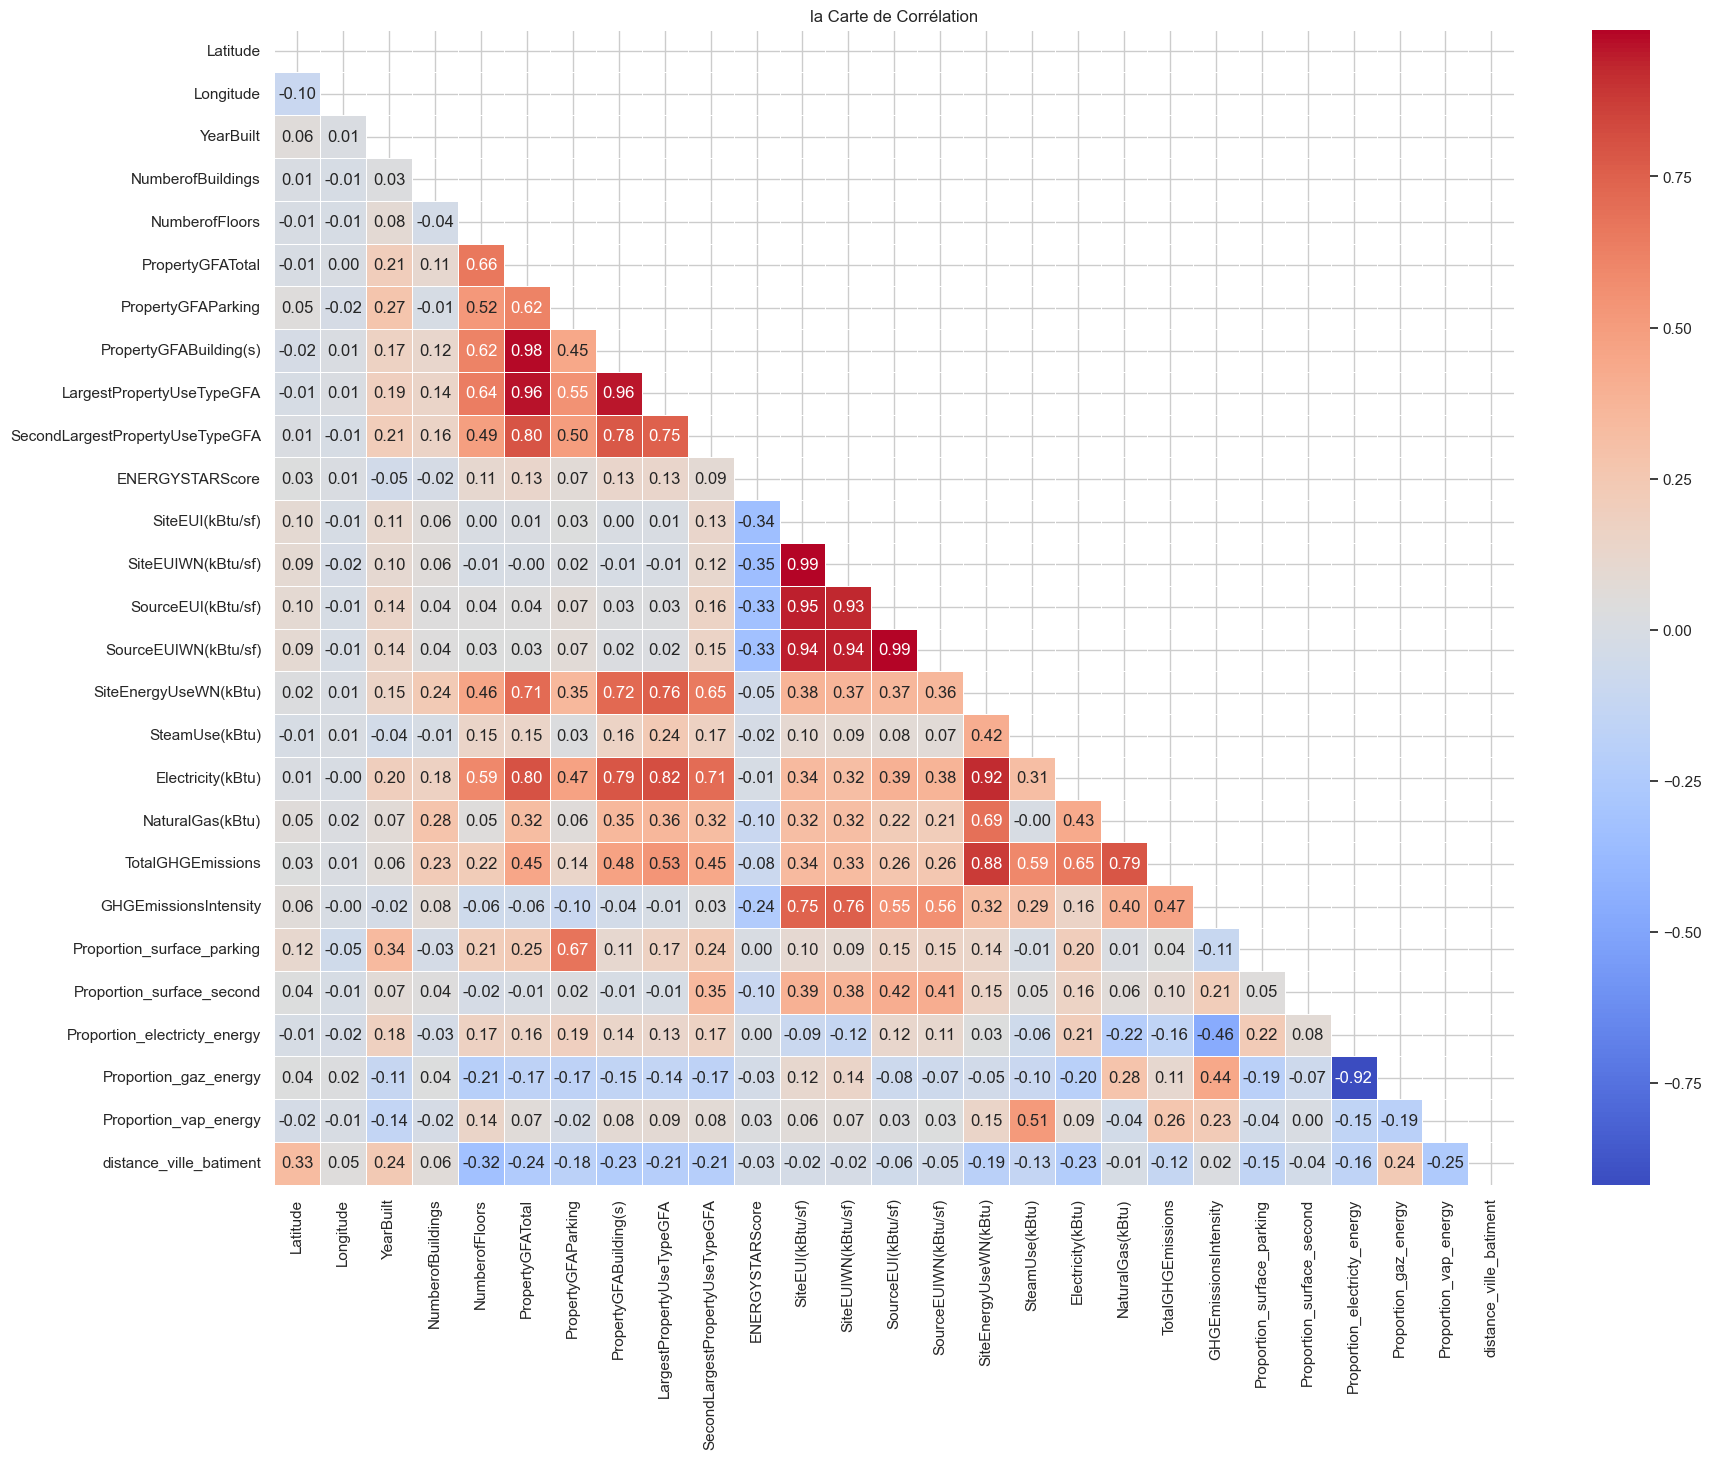

In [50]:
#Correlation
correlation_matrix = data.corr()
plt.figure(figsize=(20, 15))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)

plt.title('la Carte de Corrélation')
plt.show()

In [51]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Proportion_surface_parking', 'Proportion_surface_second',
       'Proportion_electricty_energy', 'Proportion_gaz_energy',
       'Proportion_vap_energy', 'distance_ville_batiment'],
      dtype='object')

Pour obtenir des résultats précis dans notre modèle de prévision, nous allons éliminer les données fortement corrélées au cours de cette étape.

In [52]:
#Colonnes fortement correlés 
data=data.drop(['Latitude','Longitude','SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','GHGEmissionsIntensity','ListOfAllPropertyUseTypes','PropertyGFABuilding(s)','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)'],axis=1)

# Choix des Caractéristiques

## One hot encoding

L'étape suivante consiste à encoder les valeurs catégorielles en utilisant la méthode get_dummies.

In [53]:
# One hot encoding
colonnes_catégorielles = data.select_dtypes(include='object').columns
df_encodé = pd.get_dummies(data, columns=colonnes_catégorielles)

## Choix des Caractéristiques par corrélation

Nous avons maintenant tenté de choisir les caractéristiques en se basant sur la corrélation, en vue de les comparer avec la méthode d'élimination récursive des caractéristiques (Recursive Feature Elimination ou RFE).

In [54]:
X = df_encodé.drop(columns=['SiteEnergyUseWN(kBtu)'] )
y = df_encodé['SiteEnergyUseWN(kBtu)'] 

correlations = X.corrwith(y)
sorted_features = correlations.abs().sort_values(ascending=False)
correlation_threshold = 0.75
selected_features = sorted_features[sorted_features.between(0.05, correlation_threshold)]
print("Caractéristiques sélectionnées:", selected_features.index.tolist())

Caractéristiques sélectionnées: ['PropertyGFATotal', 'NumberofFloors', 'PrimaryPropertyType_Hospital', 'SiteEUIWN(kBtu/sf)', 'PropertyGFAParking', 'NumberofBuildings', 'SecondLargestPropertyUseType_Other', 'BuildingType_Campus', 'distance_ville_batiment', 'Neighborhood_DOWNTOWN', 'LargestPropertyUseType_Warehouse', 'PrimaryPropertyType_Warehouse', 'YearBuilt', 'Proportion_surface_second', 'Proportion_surface_parking', 'Neighborhood_GREATER DUWAMISH', 'LargestPropertyUseType_University', 'LargestPropertyUseType_Laboratory', 'Neighborhood_EAST', 'ComplianceStatus_Compliant', 'LargestPropertyUseType_Office', 'LargestPropertyUseType_Hotel', 'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_Office', 'Outlier_High outlier', 'BuildingType_SPS-District K-12', 'SecondLargestPropertyUseType_Laboratory', 'SecondLargestPropertyUseType_Office', 'ENERGYSTARScore']


In [55]:
selected_features_top_10 = selected_features.head(10)
selected_features.head(10)

PropertyGFATotal                      0.712309
NumberofFloors                        0.455493
PrimaryPropertyType_Hospital          0.420518
SiteEUIWN(kBtu/sf)                    0.371735
PropertyGFAParking                    0.354595
NumberofBuildings                     0.237269
SecondLargestPropertyUseType_Other    0.235735
BuildingType_Campus                   0.229101
distance_ville_batiment               0.190164
Neighborhood_DOWNTOWN                 0.185806
dtype: float64

In [56]:
df_encodé = df_encodé.dropna(axis=1)

## Recursive Feature Elimination

### Définition

La Recursive Feature Elimination (RFE) est une méthode d'élimination de caractéristiques utilisée dans le domaine de l'apprentissage automatique pour sélectionner les variables les plus importantes ou informatives d'un ensemble de données. Elle fonctionne en éliminant itérativement les caractéristiques les moins importantes du modèle, en se basant sur des critères définis, et en répétant ce processus jusqu'à ce qu'un nombre spécifié de caractéristiques souhaitées soit atteint.

### Pour l'energie

In [57]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X = df_encodé.drop(columns=['SiteEnergyUseWN(kBtu)'])
y = df_encodé['SiteEnergyUseWN(kBtu)']

correlations = X.corrwith(y)

selected_columns = correlations[correlations.abs() < 0.84].index

X_filtered = X[selected_columns]

model = RandomForestRegressor(n_estimators=200)

rfe = RFE(model, n_features_to_select=15)
fit = rfe.fit(X_filtered, y)

selected_features = X_filtered.columns[fit.support_]
print("Caractéristiques sélectionnées:", selected_features.tolist())

Caractéristiques sélectionnées: ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'Proportion_surface_parking', 'Proportion_surface_second', 'distance_ville_batiment', 'BuildingType_Campus', 'PrimaryPropertyType_Hospital', 'Neighborhood_EAST', 'LargestPropertyUseType_Hotel', 'SecondLargestPropertyUseType_Other']


In [58]:
df_selected_features = pd.concat([X[selected_features], y], axis=1)
data_Enrgy=df_selected_features.to_csv('data_Energy_Final.csv', index=False)

### Pour l'emission de CO2

In [65]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X1 = df_encodé.drop(columns=['TotalGHGEmissions'])
y1 = df_encodé['TotalGHGEmissions']

correlations1 = X1.corrwith(y)

selected_columns1 = correlations[correlations.abs() < 0.84].index

X_filtered1 = X[selected_columns]

model = RandomForestRegressor(n_estimators=200)

rfe = RFE(model, n_features_to_select=25)
fit = rfe.fit(X_filtered1, y1)

selected_features1 = X_filtered1.columns[fit.support_]
print("Caractéristiques sélectionnées:", selected_features1.tolist())

Caractéristiques sélectionnées: ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'Proportion_surface_parking', 'Proportion_surface_second', 'distance_ville_batiment', 'BuildingType_Campus', 'BuildingType_NonResidential', 'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other', 'PrimaryPropertyType_University', 'Neighborhood_CENTRAL', 'Neighborhood_DOWNTOWN', 'Neighborhood_EAST', 'Neighborhood_LAKE UNION', 'LargestPropertyUseType_Hotel', 'LargestPropertyUseType_Laboratory', 'LargestPropertyUseType_Office', 'SecondLargestPropertyUseType_Other']


In [66]:
df_selected_features = pd.concat([X1[selected_features1],y1],axis=1)
data_EMISSION=df_selected_features.to_csv('data_emission_Final.csv', index=False)